In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file_paths = ['./csv/education/australia.csv', './csv/education/finland.csv', './csv/education/france.csv',
              './csv/education/italy.csv', './csv/education/japan.csv', './csv/education/korea.csv',
              './csv/education/netherlands.csv', './csv/education/poland.csv', './csv/education/singapore.csv',
              './csv/education/switerland.csv']

In [58]:
def read_and_transform_csv(file_paths):
    list_of_dataframes = {}
    for path in file_paths:
        name = path.split('/')[-1].split('.')[0]
        df = pd.read_csv(path)

        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Value'].fillna(0, inplace=True)
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        list_of_dataframes[name] = df
    return list_of_dataframes

lista = read_and_transform_csv(file_paths)

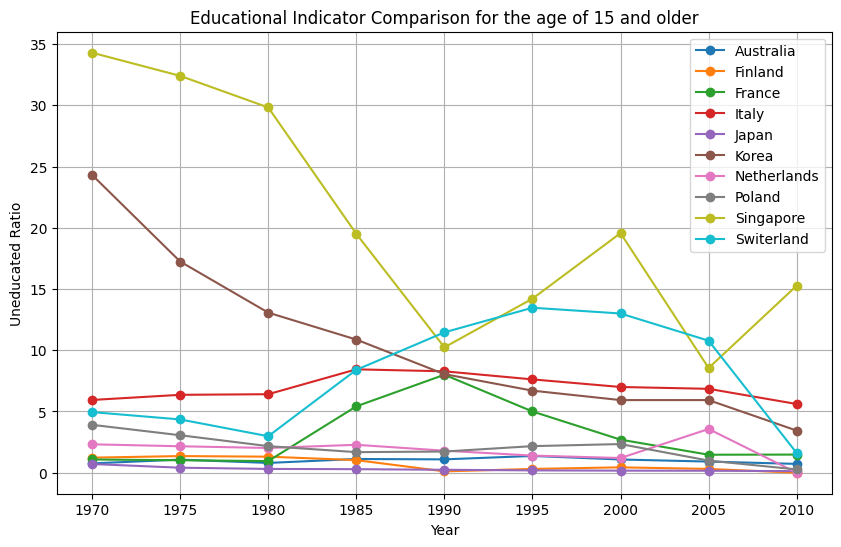

In [59]:

countries = ['australia', 'finland', 'france', 'italy', 'japan', 'korea', 'netherlands', 'poland', 'singapore', 'switerland']

age_and_gender_groups = ['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS','BAR.NOED.15UP.FE.ZS', 'BAR.NOED.15UP.ZS',
              'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
              'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS', 'BAR.NOED.25UP.ZS',
              'BAR.NOED.3034.FE.ZS', 'BAR.NOED.3034.ZS',
              'BAR.NOED.3539.FE.ZS', 'BAR.NOED.3539.ZS',
              'BAR.NOED.4044.FE.ZS', 'BAR.NOED.4044.ZS',
              'BAR.NOED.4549.FE.ZS', 'BAR.NOED.4549.ZS',
              'BAR.NOED.5054.FE.ZS', 'BAR.NOED.5054.ZS',
              'BAR.NOED.5559.FE.ZS', 'BAR.NOED.5559.ZS',
              'BAR.NOED.6064.FE.ZS', 'BAR.NOED.6064.ZS']

indicator_code = 'BAR.NOED.15UP.ZS'

plt.figure(figsize=(10, 6))


for country in countries:
    df_country = lista[country]
    df_indicator = df_country[df_country['Indicator Code'] == indicator_code]

    plt.plot(df_indicator['Year'], df_indicator['Value'], marker='o', label=country.capitalize())


plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison for the age of 15 and older')
plt.legend()
plt.grid(True)
plt.show()